In [1]:
%env KERAS_BACKED=tensorflow

env: KERAS_BACKED=tensorflow


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 讀入MNIST Database

In [3]:
from keras.datasets import mnist

D:\ProgramData\Anaconda\envs\snake\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
x_train[1234].shape

(28, 28)

In [6]:
#CNN 要的是 (28,28,1)

In [7]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [8]:
x_train[1234].shape

(28, 28, 1)

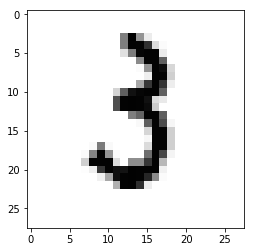

In [9]:
X = x_train[1234]
X = X.reshape(28,28)
plt.imshow(X,cmap='Greys')

In [10]:
from keras.utils import np_utils

In [11]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [12]:
#資料常規化(壓到0～1之間) #在CNN裡面比較不會飄
x_train = x_train/255
x_test = x_test/255

# 開始建神經網絡 (上課示範版)

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras.optimizers import SGD

In [14]:
model = Sequential()
model.add(Conv2D(4,(5,5),padding='same',input_shape=(28,28,1) ))
#決定有幾個filter跟filter size、padding
model.add(Activation('relu'))

Instructions for updating:
Colocations handled automatically by placer.


Max-pooling

In [15]:
model.add(MaxPool2D(pool_size=(2,2)))

第二次convolution!& Max-pooling

In [16]:
model.add(Conv2D(8,(5,5),padding='same'))
model.add(Activation('relu'))

In [17]:
model.add(MaxPool2D(pool_size=(2,2)))

第三次

In [18]:
model.add(Conv2D(16,(5,5),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

要送進一般的神經網絡

In [19]:
#拉平
model.add(Flatten())
model.add(Dense(9))
model.add(Activation('relu'))

In [20]:
model.add(Dense(10))
model.add(Activation('softmax'))

# 組裝

In [21]:
model.compile(loss='mse',optimizer=SGD(lr=0.07),metrics=['accuracy'])

# View

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         808       
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          3216      
__________

# Train

In [23]:
model.fit(x_train,y_train,batch_size=100, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.0896 - acc: 0.20760s - loss: 0.0896 -
Epoch 2/10
60000/60000 [==============================] - 40s 666us/step - loss: 0.0882 - acc: 0.31481s - l
Epoch 3/10
60000/60000 [==============================] - 40s 669us/step - loss: 0.0800 - acc: 0.4094
Epoch 4/10
60000/60000 [==============================] - 41s 677us/step - loss: 0.0511 - acc: 0.6353
Epoch 5/10
60000/60000 [==============================] - 41s 691us/step - loss: 0.0383 - acc: 0.7308
Epoch 6/10
60000/60000 [==============================] - 41s 689us/step - loss: 0.0353 - acc: 0.7483
Epoch 7/10
60000/60000 [==============================] - 42s 697us/step - loss: 0.0312 - acc: 0.7771
Epoch 8/10
60000/60000 [==============================] - 42s 693us/step - loss: 0.0245 - acc: 0.8304
Epoch 9/10
60000/60000 [==============================] - 42s 697us/step - loss: 0.0225 - acc: 0.8422
Epoch 10/

In [24]:
score = model.evaluate(x_train,y_train,batch_size=100)
print("Loss : %f" %score[0])
print("Accuracy is :%f" %(score[1]*100))

60000/60000 [==============================] - 15s 246us/step
Loss : 0.020749
Accuracy is :85.283333


試著把訓練的batch_size改大一點

In [25]:
model.fit(x_train,y_train,batch_size=10000, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 26s 436us/step - loss: 0.0203 - acc: 0.8549
Epoch 2/10
60000/60000 [==============================] - 23s 389us/step - loss: 0.0202 - acc: 0.8553
Epoch 3/10
60000/60000 [==============================] - 24s 394us/step - loss: 0.0202 - acc: 0.8555
Epoch 4/10
60000/60000 [==============================] - 23s 386us/step - loss: 0.0202 - acc: 0.8554
Epoch 5/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0202 - acc: 0.8554
Epoch 6/10
60000/60000 [==============================] - 20s 331us/step - loss: 0.0202 - acc: 0.8555
Epoch 7/10
60000/60000 [==============================] - 20s 331us/step - loss: 0.0202 - acc: 0.8555
Epoch 8/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.0201 - acc: 0.8557
Epoch 9/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.0201 - acc: 0.8556
Epoch 10/10
60000/60000 [==============================] - 20s 335us/step - loss: 

In [26]:
score = model.evaluate(x_train,y_train,batch_size=100)
print("Loss : %f" %score[0])
print("Accuracy is :%f" %(score[1]*100))

60000/60000 [==============================] - 15s 247us/step
Loss : 0.020118
Accuracy is :85.575000


# 小結
在不改變原來模型的設計的情況下，修改batch_size差異只會體現在model的訓練時間。
準確率的改善，純粹是因為那個model在這個專案環境下跑了兩次訓練，所以分數不一樣。

# 試著用Functional API的想法搭一個中間 Conv多一點的神經網絡

In [27]:
#打包
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add #concatenate把兩個當量結合在一起

In [28]:
#第一個變數必定以 Input 函數來定義
x = Input(shape=(28,28,1))

In [29]:
#定義每一層神經元數量
f1 = Conv2D(4,(5,5),padding='same',activation='relu' ) #4
f2 = MaxPool2D(pool_size=(2,2)) #pooling
f3 = Conv2D(8,(5,5),padding='same',activation='relu' )  #8
f4 = MaxPool2D(pool_size=(2,2)) #pooling
f5 = Conv2D(16,(5,5),padding='same',activation='relu' ) #16
f6 = MaxPool2D(pool_size=(2,2)) #pooling
f7 = Conv2D(32,(5,5),padding='same',activation='relu' ) #32
f8 = MaxPool2D(pool_size=(2,2)) #pooling
f9 = Flatten() #拉平
f10 = Dense(9,activation='relu')
f11 = Dense(10,activation='softmax') #9->10

接著，定義層前後變數之間的關係

In [30]:
h1 = f1(x)
h2 = f2(h1)
h3 = f3(h2)
h4 = f4(h3)
h5 = f5(h4)
h6 = f6(h5)
h7 = f7(h6)
h8 = f8(h7)
h9 = f9(h8)
h10 = f10(h9)
y = f11(h10)

In [31]:
CNNmodel = Model(x,y)
CNNmodel.compile(loss='mse', optimizer=SGD(lr=0.007), metrics=['accuracy'])
CNNmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 8)         808       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 16)          3216      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 16)          0         
__________

In [32]:
CNNmodel.fit(x_train,y_train,batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 44s 739us/step - loss: 0.0900 - acc: 0.1582
Epoch 2/10
60000/60000 [==============================] - 43s 717us/step - loss: 0.0899 - acc: 0.1652
Epoch 3/10
60000/60000 [==============================] - 43s 708us/step - loss: 0.0899 - acc: 0.1664
Epoch 4/10
60000/60000 [==============================] - 43s 721us/step - loss: 0.0899 - acc: 0.1659
Epoch 5/10
60000/60000 [==============================] - 44s 735us/step - loss: 0.0899 - acc: 0.1653
Epoch 6/10
60000/60000 [==============================] - 44s 736us/step - loss: 0.0899 - acc: 0.1663
Epoch 7/10
60000/60000 [==============================] - 44s 726us/step - loss: 0.0899 - acc: 0.1677
Epoch 8/10
60000/60000 [==============================] - 44s 730us/step - loss: 0.0898 - acc: 0.1690
Epoch 9/10
60000/60000 [==============================] - 43s 720us/step - loss: 0.0898 - acc: 0.1715
Epoch 10/10
60000/60000 [==============================] - 44s 740us/step - loss: 

In [33]:
score = CNNmodel.evaluate(x_train,y_train,batch_size=100)
print("Loss : %f" %score[0])
print("Accuracy is :%f" %(score[1]*100))

60000/60000 [==============================] - 10s 172us/step
Loss : 0.089796
Accuracy is :17.541667


# 小結2
結果把模型從 Sequential 拆到 Functional API 之後，準確率反而發生慘劇

# 那如果把Functional API的CNN的Filer數量增加呢？

In [34]:
#定義每一層神經元數量
f1 = Conv2D(32,(5,5),padding='same',activation='relu' ) #32
f2 = MaxPool2D(pool_size=(2,2)) #pooling
f3 = Conv2D(64,(5,5),padding='same',activation='relu' )  #64
f4 = MaxPool2D(pool_size=(2,2)) #pooling
f5 = Conv2D(128,(5,5),padding='same',activation='relu' ) #128
f6 = MaxPool2D(pool_size=(2,2)) #pooling
f7 = Flatten() #拉平
f8 = Dense(100,activation='sigmoid')
f9 = Dense(10,activation='softmax') #9->10

In [35]:
h1 = f1(x)
h2 = f2(h1)
h3 = f3(h2)
h4 = f4(h3)
h5 = f5(h4)
h6 = f6(h5)
h7 = f7(h6)
h8 = f8(h7)
y = f9(h8)

In [36]:
CNNmodel2 = Model(x,y)
CNNmodel2.compile(loss='mse', optimizer=SGD(lr=0.007), metrics=['accuracy'])
CNNmodel2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 128)         204928    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 128)         0         
__________

In [37]:
CNNmodel2.fit(x_train,y_train,batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0951 - acc: 0.0903
Epoch 2/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0932 - acc: 0.0904
Epoch 3/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0923 - acc: 0.1010
Epoch 4/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0917 - acc: 0.1045
Epoch 5/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0912 - acc: 0.1044
Epoch 6/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0908 - acc: 0.1044
Epoch 7/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0906 - acc: 0.1044
Epoch 8/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0904 - acc: 0.1044
Epoch 9/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0902 - acc: 0.1044
Epoch 10/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0901 - a

In [38]:
CNNmodel2.fit(x_train,y_train,batch_size=10000, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0901 - acc: 0.1044
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0901 - acc: 0.1044
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0901 - acc: 0.1044
Epoch 4/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0901 - acc: 0.1044
Epoch 5/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0901 - acc: 0.1044
Epoch 6/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0901 - acc: 0.1044
Epoch 7/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0901 - acc: 0.1044
Epoch 8/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0901 - acc: 0.1044
Epoch 9/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0901 - acc: 0.1044
Epoch 10/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0901 - a

In [39]:
score = CNNmodel2.evaluate(x_train,y_train,batch_size=100)
print("Loss : %f" %score[0])
print("Accuracy is :%f" %(score[1]*100))

60000/60000 [==============================] - 70s 1ms/step
Loss : 0.090073
Accuracy is :10.441667


# 小結3
##### 看起來準確率依舊慘烈呢... 
##### 雖然比起前面的好一點點，但好像也就只有一點點
##### 而且 Sequential的版本好像還跑的快一點點 -`д´-

# 那如果把relu換成sigmoid呢？

In [40]:
#定義每一層神經元數量
f1 = Conv2D(4,(5,5),padding='same',activation='sigmoid' ) #4
f2 = MaxPool2D(pool_size=(2,2)) #pooling
f3 = Conv2D(8,(5,5),padding='same',activation='sigmoid' )  #8
f4 = MaxPool2D(pool_size=(2,2)) #pooling
f5 = Conv2D(16,(5,5),padding='same',activation='sigmoid' ) #16
f6 = MaxPool2D(pool_size=(2,2)) #pooling
f7 = Flatten() #拉平
f8 = Dense(100,activation='sigmoid')
f9 = Dense(10,activation='softmax') #9->10

In [41]:
h1 = f1(x)
h2 = f2(h1)
h3 = f3(h2)
h4 = f4(h3)
h5 = f5(h4)
h6 = f6(h5)
h7 = f7(h6)
h8 = f8(h7)
y = f9(h8)

In [42]:
CNNmodel3 = Model(x,y)
CNNmodel3.compile(loss='mse', optimizer=SGD(lr=0.007), metrics=['accuracy'])
CNNmodel3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 4)         104       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 8)         808       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 16)          3216      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 16)          0         
__________

In [43]:
CNNmodel3.fit(x_train,y_train,batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 42s 698us/step - loss: 0.0927 - acc: 0.0999
Epoch 2/10
60000/60000 [==============================] - 42s 694us/step - loss: 0.0916 - acc: 0.10214s 
Epoch 3/10
60000/60000 [==============================] - 41s 688us/step - loss: 0.0910 - acc: 0.09870s - loss: 0.0910 - acc:
Epoch 4/10
60000/60000 [==============================] - 41s 689us/step - loss: 0.0907 - acc: 0.09979s - -
Epoch 5/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.0905 - acc: 0.1080
Epoch 6/10
60000/60000 [==============================] - 41s 681us/step - loss: 0.0904 - acc: 0.1124
Epoch 7/10
60000/60000 [==============================] - 41s 678us/step - loss: 0.0903 - acc: 0.11241s - loss: 0.0903 - ac - ETA: 1s - loss: 0.09
Epoch 8/10
60000/60000 [==============================] - 41s 676us/step - loss: 0.0902 - acc: 0.11241s - loss: 0.0 - ETA: 0s - loss: 0.0902 - acc: 0.1 - ETA: 0s - loss: 0.0902 - acc: 0
Epoch 9/10
60000/60000

In [44]:
score = CNNmodel3.evaluate(x_train,y_train,batch_size=100)
print("Loss : %f" %score[0])
print("Accuracy is :%f" %(score[1]*100))

60000/60000 [==============================] - 16s 267us/step
Loss : 0.090096
Accuracy is :11.236667


# 小結4
好的，就比前面的relu又好一咪咪而已。看來Funcional API可能不是CNN的好歸屬╮(╯_╰)╭

# 最後我們來前人種...咳咳，不是，是利用之前助教教的轉移學習，來看看把原先老師給的model包一包之後在額外加一層NN試試看 ლ(́◕◞౪◟◕‵ლ)

In [54]:
first_layer = [Conv2D(4,(5,5),padding='same',input_shape=(28,28,1) ),Activation('sigmoid')]
second_layer = [MaxPool2D(pool_size=(2,2))]
third_layer = [Conv2D(8,(5,5),padding='same'),(Activation('sigmoid'))]
forth_layer = [MaxPool2D(pool_size=(2,2))]
fifth_layer = [Conv2D(16,(5,5),padding='same'),(Activation('sigmoid'))]
sixth_layer = [MaxPool2D(pool_size=(2,2))]
seventh_layer = [Flatten()]
eighth_layer = [Dense(9),(Activation('sigmoid'))]
last_layer = [Dense(10),(Activation('softmax'))]

In [46]:
all_expect_layer = (first_layer + second_layer + third_layer + forth_layer + fifth_layer+
                   sixth_layer)

In [47]:
CNNmodel4 = Sequential(all_expect_layer + seventh_layer + eighth_layer + last_layer) 
CNNmodel4 .compile(loss='mse', optimizer=SGD(lr=0.007), metrics=['accuracy'])
CNNmodel4.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 4)         104       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 8)         808       
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 16)          3216      
__________

In [48]:
CNNmodel4.fit(x_train,y_train,batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 41s 689us/step - loss: 0.0914 - acc: 0.0986
Epoch 2/10
60000/60000 [==============================] - 40s 671us/step - loss: 0.0912 - acc: 0.0986
Epoch 3/10
60000/60000 [==============================] - 41s 678us/step - loss: 0.0911 - acc: 0.0986
Epoch 4/10
60000/60000 [==============================] - 41s 675us/step - loss: 0.0911 - acc: 0.09861s - loss: 0.0
Epoch 5/10
60000/60000 [==============================] - 41s 677us/step - loss: 0.0910 - acc: 0.0986
Epoch 6/10
60000/60000 [==============================] - 40s 674us/step - loss: 0.0909 - acc: 0.0986
Epoch 7/10
60000/60000 [==============================] - 40s 673us/step - loss: 0.0909 - acc: 0.0986
Epoch 8/10
60000/60000 [==============================] - ETA: 0s - loss: 0.0908 - acc: 0.098 - 40s 671us/step - loss: 0.0908 - acc: 0.0986
Epoch 9/10
60000/60000 [==============================] - 41s 677us/step - loss: 0.0908 - acc: 0.0986
Epoch 10/10
60000/60000 [=====

In [49]:
score = CNNmodel4.evaluate(x_train,y_train,batch_size=100)
print("Loss : %f" %score[0])
print("Accuracy is :%f" %(score[1]*100))

60000/60000 [==============================] - 16s 267us/step
Loss : 0.090738
Accuracy is :9.863333


In [55]:
add_nn = [Dense(80),(Activation('sigmoid'))]

In [56]:
CNNmodel4 = Sequential(all_expect_layer + seventh_layer + eighth_layer + add_nn + last_layer) 
CNNmodel4 .compile(loss='mse', optimizer=SGD(lr=0.007), metrics=['accuracy'])
CNNmodel4.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 4)         104       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 8)         808       
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 16)          3216      
__________

In [57]:
CNNmodel4.fit(x_train,y_train,batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 42s 701us/step - loss: 0.0930 - acc: 0.0991
Epoch 2/10
60000/60000 [==============================] - 41s 683us/step - loss: 0.0921 - acc: 0.0991
Epoch 3/10
60000/60000 [==============================] - 41s 688us/step - loss: 0.0915 - acc: 0.0991
Epoch 4/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.0912 - acc: 0.0992
Epoch 5/10
60000/60000 [==============================] - 39s 645us/step - loss: 0.0909 - acc: 0.0991
Epoch 6/10
60000/60000 [==============================] - 37s 611us/step - loss: 0.0908 - acc: 0.0991
Epoch 7/10
60000/60000 [==============================] - 37s 611us/step - loss: 0.0906 - acc: 0.0991
Epoch 8/10
60000/60000 [==============================] - 36s 607us/step - loss: 0.0905 - acc: 0.09913s - lo
Epoch 9/10
60000/60000 [==============================] - 37s 610us/step - loss: 0.0904 - acc: 0.1099
Epoch 10/10
60000/60000 [==============================] - 37s 618us/step -

In [58]:
score = CNNmodel4.evaluate(x_train,y_train,batch_size=100)
print("Loss : %f" %score[0])
print("Accuracy is :%f" %(score[1]*100))

60000/60000 [==============================] - 15s 245us/step
Loss : 0.090327
Accuracy is :11.236667


# 小結5
增加層數準確度可能會上升，或許之後重複訓練準確度會更好一點，但還是不知道為什麼準確度沒有一開始直接用Sequential搭出來的好。ˊ ˋ 